## 1. Setup enviorment

In [1]:
from Preprocessing.time_series_preprocessing import get_dengue_dataset, get_municipality_name
from Preprocessing.time_series_preprocessing import preprocess_dataset_to_time_series

from Models.LSTM import create_model, train_model
import tensorflow as tf

from Utils.test_lstm import evaluate, plot_predictions, calculate_mean_std, evaluate_lstm_for_city

import pandas as pd
import os
import numpy as np

### Constants

In [2]:
""" Read Dataset:"""
embeddings_dir = 'Embeddings/'
labels = '../Tabular_data/dengue_tabular.csv'

#Municipality='Medellín'

""" Dataset Preprocessing:"""
train_percentage = 70
T=3
autoregressive = True

""" Model Parameters:"""
lstm_layers=[1000, 500]
nn_layers=[250, 120, 1]
dense_acivation='relu'
recurrent_cells='LSTM'
bidirectional=False


## Create and Evaluate Model for a City

In [3]:
def run_experiments(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor=True, plot=True, epochs=100, batch_size=16, n_tests=3, plot_samples=True):
    results = {}
    
    if type(embeddings) == list:
        for embedding in embeddings:
            results[embedding] = {}
            if type(Municipality) == list:
                for municipality in Municipality:
                    rmse, mape, smape = evaluate_lstm_for_city(labels, embedding, municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples)
                    results[embedding][municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
            else:
                rmse, mape, smape = rmse, mape, smapeevaluate_lstm_for_city(labels, embedding, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples)
                results[embedding][Municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
    else:
        if type(Municipality) == list:
            for municipality in Municipality:
                rmse, mape, smape = evaluate_lstm_for_city(labels, embeddings, municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples)
                results[municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
        else:
            rmse, mape, smape = evaluate_lstm_for_city(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples)
            results[Municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape}
    
    return results

## Run Experiments

In [4]:
# Get list of embeddings:
def get_list_embeddings(embeddings_dir):
    embeddings_dir = 'Embeddings/'
    embeddings = []

    for embedding in os.listdir(embeddings_dir):
        embeddings.append(os.path.join(embeddings_dir, embedding))

    return embeddings

#embeddings = get_list_embeddings(embeddings_dir)
embeddings = 'Embeddings/ResNet50V2_224_1024.csv'

In [5]:
# Get list of municipalities:
Municipality = list(pd.unique(pd.read_csv('Embeddings/ResNet50V2_224_1024.csv')['Municipality Code']))

####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Cúcuta-----------------------------------------------
####################################################################################################
Obtaining dataframe for the city of 54001 - Cúcuta only...
The train shape is: (114, 2049)
The test shape is: (50, 2049)
The shape of the features is (111, 6147)
The shape of the labels is (111, 1)
The shape of the features is (47, 6147)
The shape of the labels is (47, 1)
The initial shapes are:
The train shape is (111, 6147)
The test shape is (47, 6147)
-----------------------
The Final sha

2023-02-21 21:26:37.431126: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-21 21:26:37.431175: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-21 21:26:37.431218: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (9f7bdfccc75e): /proc/driver/nvidia/version does not exist
2023-02-21 21:26:37.431415: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-21 21:26:38.805840: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] 

Restoring model weights from the end of the best epoch.
Epoch 00025: early stopping
Test MAPE: 268.579
Test sMAPE: 95.875
Test RMSE: 57.305
{'mape': 268.578928104541, 'smape': 95.87457151807997, 'rmse': 57.30516471549462}


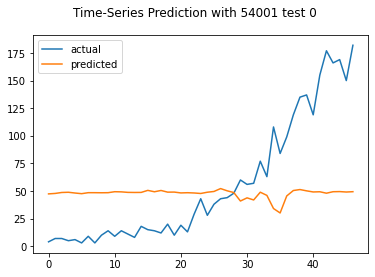

Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Test MAPE: 264.943
Test sMAPE: 92.460
Test RMSE: 56.575
{'mape': 264.9432035469733, 'smape': 92.46018623469864, 'rmse': 56.57506082158339}


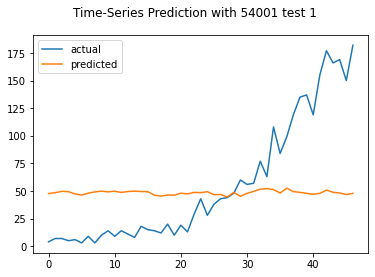

Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Test MAPE: 190.405
Test sMAPE: 90.418
Test RMSE: 58.451
{'mape': 190.4048246801953, 'smape': 90.41818754055086, 'rmse': 58.45125222192703}


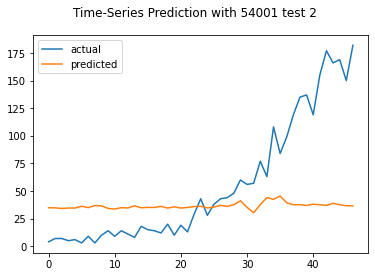

rmse : average=57.444, std=0.772
mape : average=241.309, std=36.025
smape : average=92.918, std=2.251
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Neiva------------------------------------------------
##########################################################################################

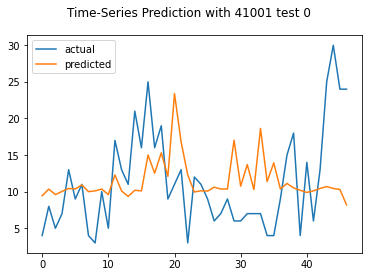

Restoring model weights from the end of the best epoch.
Epoch 00047: early stopping
Test MAPE: 87.761
Test sMAPE: 55.092
Test RMSE: 8.223
{'mape': 87.76141757823885, 'smape': 55.09172061899717, 'rmse': 8.223161440487429}


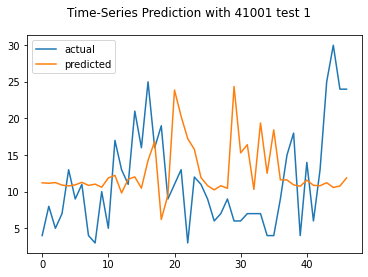

Restoring model weights from the end of the best epoch.
Epoch 00039: early stopping
Test MAPE: 76.534
Test sMAPE: 51.219
Test RMSE: 6.769
{'mape': 76.53377094539505, 'smape': 51.219139437429746, 'rmse': 6.768724588208793}


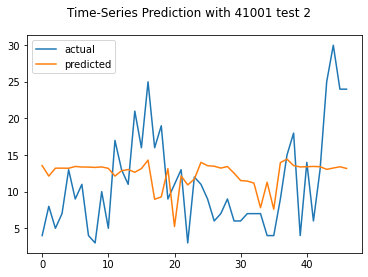

rmse : average=7.410, std=0.606
mape : average=78.324, std=7.089
smape : average=52.318, std=1.976
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
----------------------------------------------Medellín----------------------------------------------
#############################################################################################

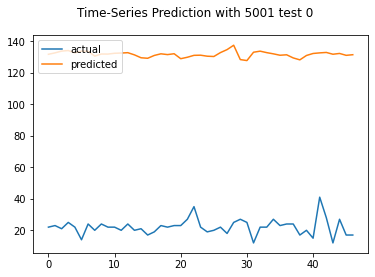

Restoring model weights from the end of the best epoch.
Epoch 00034: early stopping
Test MAPE: 107.357
Test sMAPE: 66.461
Test RMSE: 22.272
{'mape': 107.3565030549603, 'smape': 66.46062672957858, 'rmse': 22.27200173647922}


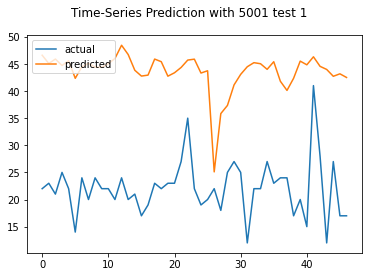

Restoring model weights from the end of the best epoch.
Epoch 00051: early stopping
Test MAPE: 474.810
Test sMAPE: 138.511
Test RMSE: 98.889
{'mape': 474.8101740254692, 'smape': 138.51089230069667, 'rmse': 98.88855775135009}


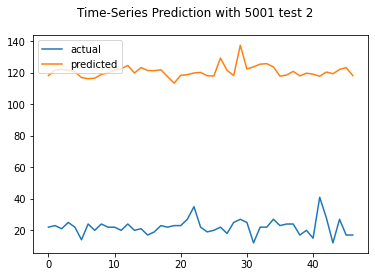

rmse : average=76.924, std=38.892
mape : average=369.579, std=186.620
smape : average=115.929, std=35.024
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-------------------------------------------Villavicencio--------------------------------------------
######################################################################################

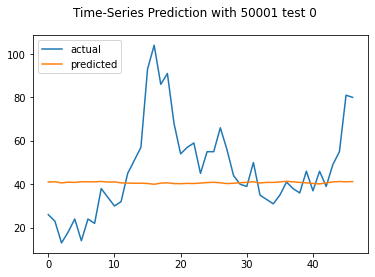

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAPE: 37.267
Test sMAPE: 36.535
Test RMSE: 22.823
{'mape': 37.26707180531692, 'smape': 36.535195061568864, 'rmse': 22.82337965568142}


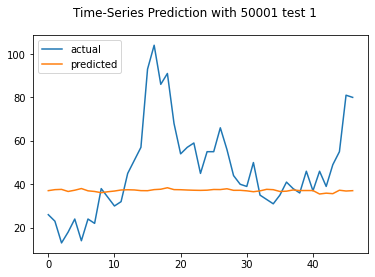

Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Test MAPE: 36.891
Test sMAPE: 40.414
Test RMSE: 24.785
{'mape': 36.89085072535565, 'smape': 40.41409102696146, 'rmse': 24.784549884178713}


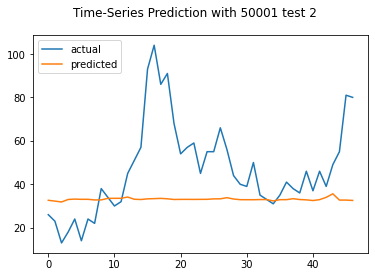

rmse : average=23.133, std=1.242
mape : average=37.863, std=1.119
smape : average=37.436, std=2.160
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
--------------------------------------------Bucaramanga---------------------------------------------
############################################################################################

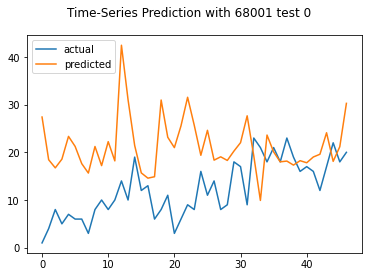

Restoring model weights from the end of the best epoch.
Epoch 00046: early stopping
Test MAPE: 118.593
Test sMAPE: 50.226
Test RMSE: 9.038
{'mape': 118.59292375140338, 'smape': 50.22556724905714, 'rmse': 9.03825503494459}


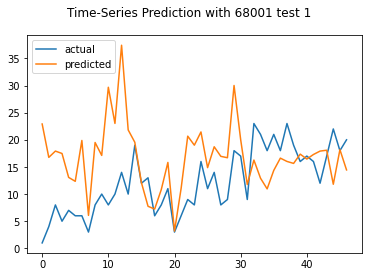

Restoring model weights from the end of the best epoch.
Epoch 00034: early stopping
Test MAPE: 101.484
Test sMAPE: 56.536
Test RMSE: 8.508
{'mape': 101.48397551052553, 'smape': 56.53617270537876, 'rmse': 8.50751926242152}


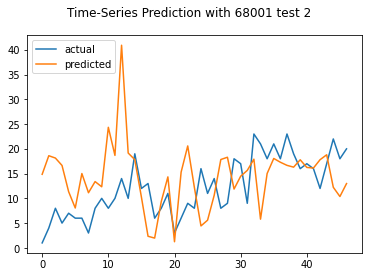

rmse : average=9.993, std=1.740
mape : average=133.120, std=33.381
smape : average=57.059, std=5.804
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
--------------------------------------------Barranquilla--------------------------------------------
###########################################################################################

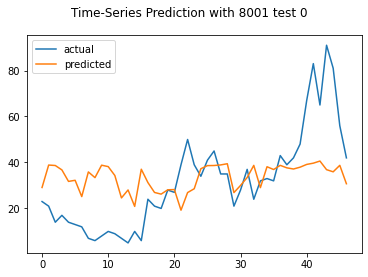

Restoring model weights from the end of the best epoch.
Epoch 00025: early stopping
Test MAPE: 96.160
Test sMAPE: 54.991
Test RMSE: 20.173
{'mape': 96.15988174656921, 'smape': 54.99083317168167, 'rmse': 20.173240747184444}


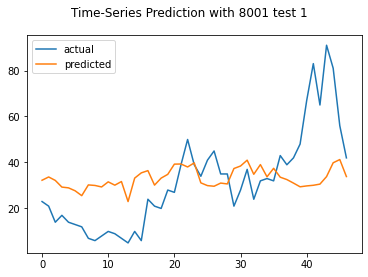

Restoring model weights from the end of the best epoch.
Epoch 00031: early stopping
Test MAPE: 86.679
Test sMAPE: 52.499
Test RMSE: 20.423
{'mape': 86.67914572129523, 'smape': 52.49851675837909, 'rmse': 20.42347378254113}


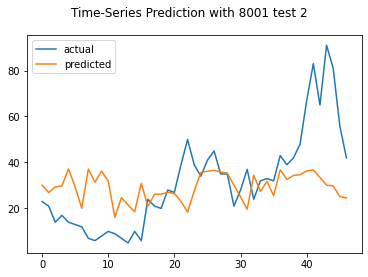

rmse : average=20.139, std=0.247
mape : average=94.374, std=5.695
smape : average=53.263, std=1.224
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
----------------------------------------------Montería----------------------------------------------
############################################################################################

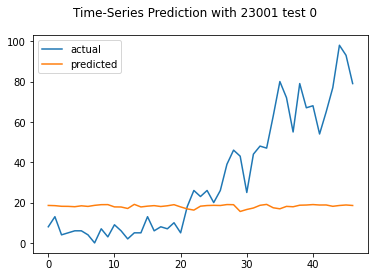

Restoring model weights from the end of the best epoch.
Epoch 00022: early stopping
Test MAPE: inf
Test sMAPE: 94.715
Test RMSE: 33.666
{'mape': inf, 'smape': 94.71471471909982, 'rmse': 33.66620101968126}


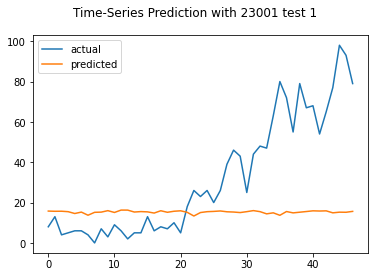

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAPE: inf
Test sMAPE: 94.773
Test RMSE: 33.548
{'mape': inf, 'smape': 94.77347379415595, 'rmse': 33.54782065707584}


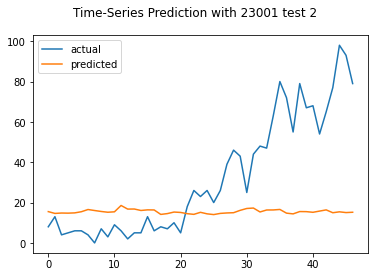

rmse : average=33.142, std=0.660
mape : average=inf, std=nan
smape : average=94.257, std=0.689
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
------------------------------------------------Cali------------------------------------------------
#################################################################################################

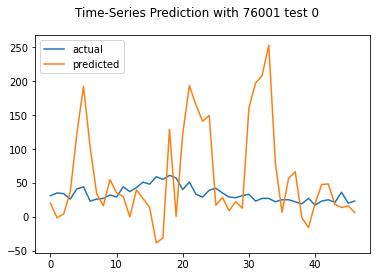

Restoring model weights from the end of the best epoch.
Epoch 00056: early stopping
Test MAPE: 319.383
Test sMAPE: 104.351
Test RMSE: 122.658
{'mape': 319.3826675427964, 'smape': 104.35131177643645, 'rmse': 122.65822809543809}


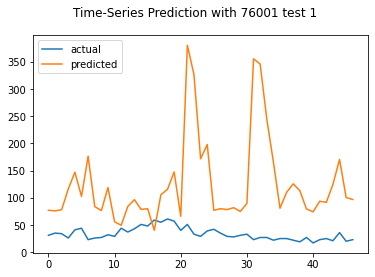

Restoring model weights from the end of the best epoch.
Epoch 00037: early stopping
Test MAPE: 535.050
Test sMAPE: 137.883
Test RMSE: 181.968
{'mape': 535.050419137136, 'smape': 137.883066862462, 'rmse': 181.9679076700411}


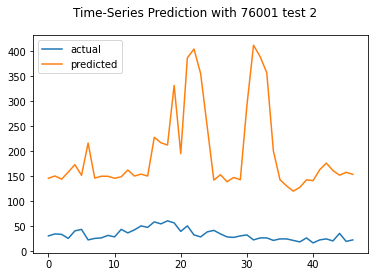

rmse : average=127.194, std=42.991
mape : average=340.503, std=150.965
smape : average=114.430, std=16.638
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Ibagué-----------------------------------------------
#####################################################################################

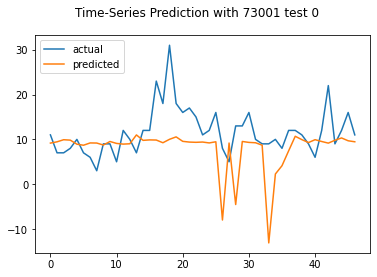

Restoring model weights from the end of the best epoch.
Epoch 00026: early stopping
Test MAPE: 139.494
Test sMAPE: 66.280
Test RMSE: 15.531
{'mape': 139.49418950724362, 'smape': 66.28025145177456, 'rmse': 15.53098286936539}


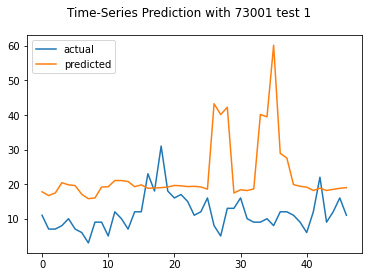

Restoring model weights from the end of the best epoch.
Epoch 00043: early stopping
Test MAPE: 62.564
Test sMAPE: 47.449
Test RMSE: 10.320
{'mape': 62.56415392052846, 'smape': 47.44908941936833, 'rmse': 10.320236414455612}


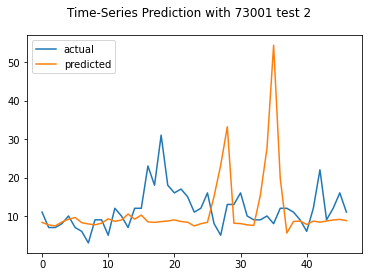

rmse : average=11.055, std=3.395
mape : average=82.940, std=40.507
smape : average=54.042, std=8.663
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
--------------------------------------------Embeddings: --------------------------------------------
---------------------------------Embeddings/ResNet50V2_224_1024.csv---------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Itagüí-----------------------------------------------
###########################################################################################

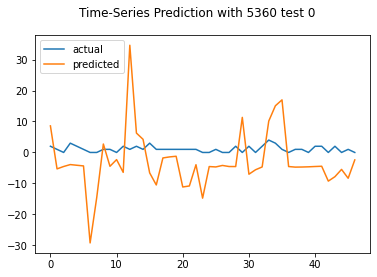

Restoring model weights from the end of the best epoch.
Epoch 00038: early stopping
Test MAPE: inf
Test sMAPE: 155.278
Test RMSE: 9.561
{'mape': inf, 'smape': 155.27823246635398, 'rmse': 9.561446781057267}


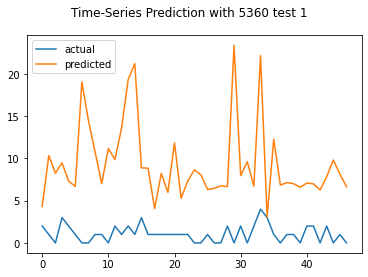

Restoring model weights from the end of the best epoch.
Epoch 00047: early stopping
Test MAPE: inf
Test sMAPE: 165.752
Test RMSE: 12.015
{'mape': inf, 'smape': 165.75153602749677, 'rmse': 12.014825002390253}


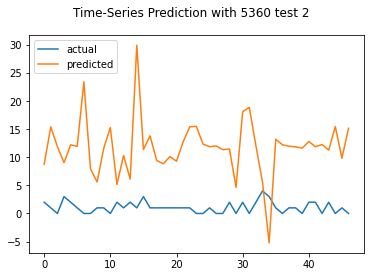

rmse : average=10.517, std=1.072
mape : average=inf, std=nan
smape : average=169.638, std=13.593
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################


In [6]:
results = run_experiments(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor=True, plot=None, epochs=100, batch_size=16, n_tests=3, plot_samples=True)

In [7]:
results

{54001: {'rmse': [57.44382591966835, 0.772201933796264],
  'mape': [241.3089854439032, 36.02526715661003],
  'smape': [92.91764843110984, 2.250923554664932]},
 41001: {'rmse': [7.4098861337426785, 0.6061155002226114],
  'mape': [78.32374943910442, 7.088976414714076],
  'smape': [52.317701655494396, 1.9756159767412824]},
 5001: {'rmse': [76.92439404634314, 38.892281846895216],
  'mape': [369.5792121063434, 186.6196784517551],
  'smape': [115.92941938507788, 35.02386009863453]},
 50001: {'rmse': [23.13282743769871, 1.2417254453460826],
  'mape': [37.862585251369076, 1.118804489834153],
  'smape': [37.43606835100043, 2.159841145092931]},
 68001: {'rmse': [9.993451236575195, 1.7396839163125442],
  'mape': [133.11980204165778, 33.380887893095505],
  'smape': [57.05871216940799, 5.8043377387547395]},
 8001: {'rmse': [20.139492302492176, 0.24680406777172376],
  'mape': [94.37356349718787, 5.6950457362286535],
  'smape': [53.26340014758363, 1.2241423189944236]},
 23001: {'rmse': [33.1416558143